## Sequential Forward Selection (SFS)

### 1.Unbalanced Data

#### Import dataset

In [1]:
import pandas as pd
df = pd.read_csv("Finaltest.csv")

In [2]:
df.head()

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target
0,1,9Uee7oEuuMmgPx2IzPfFkWgkHZyPbWr0,0,195,119,107,0,25,66,87,29,0,0
1,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,0,200,88,79,26,14,22,138,9,0,0
2,4,FIHlppZyoq8muPbdVxS44gfvceX9zvU7,0,19,80,64,0,15,10,6,4,0,0
3,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,0,431,202,226,34,30,87,170,86,0,0
4,6,dpK33RH9yepUAnyoywRwBt1AJzxGlaja,0,6,17,12,0,5,2,2,2,0,0


In [3]:
df.shape

(120542, 13)

In [4]:
#Check missing value
df.isnull().sum()

enrollment_id       0
username            0
course_id           0
source_browser      0
source_server       0
event_access        0
event_discussion    0
event_navigate      0
event_page_close    0
event_problem       0
event_video         0
event_wiki          0
Target              0
dtype: int64

In [5]:
#check if any missing value
df[df.isnull().any(axis=1)]

,enrollment_id,username,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki,Target


#### Drop columns

In [6]:
#df=df.drop(columns='id_student')
df=df.drop(columns='username')
df=df.drop(columns='enrollment_id')

In [7]:
df.shape

(120542, 11)

### Target Feature and Dependent Feature

In [8]:
X = df.iloc[:,0:10] # all columns/features except target 
y = df.iloc[:,-1]  #target

In [9]:
X

,course_id,source_browser,source_server,event_access,event_discussion,event_navigate,event_page_close,event_problem,event_video,event_wiki
0,0,195,119,107,0,25,66,87,29,0
1,0,200,88,79,26,14,22,138,9,0
2,0,19,80,64,0,15,10,6,4,0
3,0,431,202,226,34,30,87,170,86,0
4,0,6,17,12,0,5,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
120537,0,0,1,0,0,1,0,0,0,0
120538,0,0,1,0,0,1,0,0,0,0
120539,0,3,5,3,0,2,2,0,1,0
120540,0,0,1,0,0,1,0,0,0,0


In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
120537    1
120538    1
120539    1
120540    1
120541    1
Name: Target, Length: 120542, dtype: int64

### Split and Train Data

In [11]:
from sklearn.model_selection import StratifiedKFold, train_test_split

#training 0.3,
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42)

### Feature Selection Models

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
X_train.shape

(84379, 10)

### Algorithms

In [15]:
ffs_lr=SequentialFeatureSelector(LogisticRegression(),k_features="best",forward=True,floating=True, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_lr.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished

[2022-11-20 23:40:08] Features: 1/10 -- score: 0.9116611275435409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.3s finished

[2022-11-20 23:40:09] Features: 2/10 -- score: 0.9131009409740007[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.5s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2022-11-20 23:40:11] Features: 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91026319, 0.91218449, 0.91336363, 0.91150474, 0.91098959]),
  'avg_score': 0.9116611275435409,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 4),
  'cv_scores': array([0.91133074, 0.91258297, 0.91588917, 0.91380895, 0.91189287]),
  'avg_score': 0.9131009409740007,
  'feature_names': ('source_server', 'event_discussion')},
 3: {'feature_idx': (2, 4, 6),
  'cv_scores': array([0.91192771, 0.91319236, 0.91568225, 0.91345372, 0.91269223]),
  'avg_score': 0.9133896536828331,
  'feature_names': ('source_server', 'event_discussion', 'event_page_close')},
 4: {'feature_idx': (2, 4, 6, 9),
  'cv_scores': array([0.91211469, 0.91313559, 0.91612721, 0.9138778 , 0.91308507]),
  'avg_score': 0.9136680707216606,
  'feature_names': ('source_server',
   'event_discussion',
   'event_page_close',
   'event_wiki')},
 5: {'feature_idx': (2, 3, 4, 6, 9),
  'cv_scores': array([0.91207743, 0.91335358, 0.91695832, 0.91360729, 0.91302653]),
  'a

In [16]:
ffs_naivebayes=SequentialFeatureSelector(GaussianNB(),k_features="best",forward=True,floating=True, verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)  
ffs_naivebayes.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-20 23:40:36] Features: 1/10 -- score: 0.9108860584578207[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-11-20 23:40:36] Features: 2/10 -- score: 0.9127156189969273[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-11-20 23:40:36] Features: 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.90932597, 0.91143216, 0.91234084, 0.91049523, 0.91083609]),
  'avg_score': 0.9108860584578207,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.91183163, 0.91155254, 0.91433044, 0.91256539, 0.9132981 ]),
  'avg_score': 0.9127156189969273,
  'feature_names': ('source_server', 'event_page_close')},
 3: {'feature_idx': (2, 3, 6),
  'cv_scores': array([0.91117764, 0.91237077, 0.91541756, 0.91309626, 0.91289074]),
  'avg_score': 0.9129905930641341,
  'feature_names': ('source_server', 'event_access', 'event_page_close')},
 4: {'feature_idx': (0, 2, 3, 6),
  'cv_scores': array([0.91117764, 0.91237077, 0.91541756, 0.91309626, 0.91289074]),
  'avg_score': 0.9129905930641341,
  'feature_names': ('course_id',
   'source_server',
   'event_access',
   'event_page_close')},
 5: {'feature_idx': (0, 2, 3, 5, 6),
  'cv_scores': array([0.91179528, 0.91131893, 0.91558651, 0.91380795, 0.91204954]),
  'avg_score'

In [17]:
ffs_dtree=SequentialFeatureSelector(DecisionTreeClassifier(),k_features= "best",forward=True,floating=True,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_dtree.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-11-20 23:40:41] Features: 1/10 -- score: 0.911398671508663[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2022-11-20 23:40:42] Features: 2/10 -- score: 0.911398671508663[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2022-11-20 23:40:43] Features: 3/

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91015387, 0.91045796, 0.91542611, 0.91063002, 0.9103254 ]),
  'avg_score': 0.911398671508663,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.91015387, 0.91045796, 0.91542611, 0.91063002, 0.9103254 ]),
  'avg_score': 0.911398671508663,
  'feature_names': ('course_id', 'source_server')},
 3: {'feature_idx': (0, 2, 9),
  'cv_scores': array([0.90800461, 0.90728239, 0.91064167, 0.90711285, 0.90724836]),
  'avg_score': 0.9080579740983448,
  'feature_names': ('course_id', 'source_server', 'event_wiki')},
 4: {'feature_idx': (0, 2, 4, 9),
  'cv_scores': array([0.90044598, 0.89614329, 0.90014388, 0.90111396, 0.89759907]),
  'avg_score': 0.8990892367584257,
  'feature_names': ('course_id',
   'source_server',
   'event_discussion',
   'event_wiki')},
 5: {'feature_idx': (0, 2, 4, 7, 9),
  'cv_scores': array([0.89188797, 0.89202423, 0.89524916, 0.89393278, 0.89259205]),
  'avg_score': 0.8931372393567385

In [18]:
ffs_mlp= SequentialFeatureSelector(MLPClassifier(max_iter=2000),k_features="best",forward=True,floating=True,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_mlp.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   17.2s remaining:   40.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.4s finished

[2022-11-20 23:42:42] Features: 1/10 -- score: 0.9110104700557228[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   26.3s remaining:   52.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   36.4s finished

[2022-11-20 23:43:19] Features: 2/10 -- score: 0.9123721468706568[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   41.3s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   21.8s finished

[2022-11-20 23:44:43] Features: 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.9083081 , 0.91065181, 0.91459919, 0.90970046, 0.9117928 ]),
  'avg_score': 0.9110104700557228,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 7),
  'cv_scores': array([0.90839276, 0.91211814, 0.91489738, 0.91402651, 0.91242595]),
  'avg_score': 0.9123721468706568,
  'feature_names': ('source_server', 'event_problem')},
 3: {'feature_idx': (2, 4, 7),
  'cv_scores': array([0.91219109, 0.91235031, 0.91809619, 0.91324101, 0.91230802]),
  'avg_score': 0.9136373243241049,
  'feature_names': ('source_server', 'event_discussion', 'event_problem')},
 4: {'feature_idx': (2, 4, 7, 8),
  'cv_scores': array([0.91292933, 0.91348911, 0.91851218, 0.9157974 , 0.91480875]),
  'avg_score': 0.915107351597786,
  'feature_names': ('source_server',
   'event_discussion',
   'event_problem',
   'event_video')},
 5: {'feature_idx': (2, 4, 7, 8, 9),
  'cv_scores': array([0.91201678, 0.91538626, 0.91850473, 0.91485177, 0.91445619]),
  'avg_score'

In [19]:
ffs_randomforest = SequentialFeatureSelector(RandomForestClassifier(),k_features="best",forward=True,floating=True,verbose=2,scoring= "f1", cv= 5, n_jobs=-1).fit(X_train, y_train)   
ffs_randomforest.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.2s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.8s finished

[2022-11-21 00:01:06] Features: 1/10 -- score: 0.9113108619544033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   13.2s remaining:   26.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   16.1s finished

[2022-11-21 00:01:22] Features: 2/10 -- score: 0.9113444935955484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   12.2s remaining:   36.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.6s finished

[2022-11-21 00:01:46] Features: 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91016761, 0.91035971, 0.91532736, 0.91032942, 0.91037021]),
  'avg_score': 0.9113108619544033,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.91005595, 0.91032697, 0.91532736, 0.9102638 , 0.91074839]),
  'avg_score': 0.9113444935955484,
  'feature_names': ('course_id', 'source_server')},
 3: {'feature_idx': (0, 2, 9),
  'cv_scores': array([0.90862799, 0.90797634, 0.91140332, 0.90728809, 0.90783955]),
  'avg_score': 0.9086270569184032,
  'feature_names': ('course_id', 'source_server', 'event_wiki')},
 4: {'feature_idx': (2, 4, 7, 9),
  'cv_scores': array([0.9064592 , 0.90576276, 0.90900525, 0.907162  , 0.90501578]),
  'avg_score': 0.9066809975766604,
  'feature_names': ('source_server',
   'event_discussion',
   'event_problem',
   'event_wiki')},
 5: {'feature_idx': (0, 2, 4, 7, 9),
  'cv_scores': array([0.90597301, 0.90617766, 0.90830707, 0.90815513, 0.90519988]),
  'avg_score': 0.9067625508

In [20]:
ffs_knn= SequentialFeatureSelector(KNeighborsClassifier(),k_features="best",forward=True, floating=True,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_knn.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.7s remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.8s finished

[2022-11-21 00:11:26] Features: 1/10 -- score: 0.8980965094336166[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    3.9s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.5s finished

[2022-11-21 00:11:31] Features: 2/10 -- score: 0.9026414517481379[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.6s remaining:   13.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.1s finished

[2022-11-21 00:11:42] Features: 

{1: {'feature_idx': (2,),
  'cv_scores': array([0.87426407, 0.90184159, 0.90704427, 0.90342364, 0.90390897]),
  'avg_score': 0.8980965094336166,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.90322115, 0.90203595, 0.90545862, 0.90236494, 0.90012661]),
  'avg_score': 0.9026414517481379,
  'feature_names': ('source_server', 'event_page_close')},
 3: {'feature_idx': (2, 6, 7),
  'cv_scores': array([0.90413432, 0.90351922, 0.90363886, 0.90680537, 0.90397889]),
  'avg_score': 0.9044153346428832,
  'feature_names': ('source_server', 'event_page_close', 'event_problem')},
 4: {'feature_idx': (2, 5, 6, 7),
  'cv_scores': array([0.90544495, 0.90284103, 0.90657114, 0.90721501, 0.90444662]),
  'avg_score': 0.9053037496414286,
  'feature_names': ('source_server',
   'event_navigate',
   'event_page_close',
   'event_problem')},
 5: {'feature_idx': (2, 5, 6, 7, 8),
  'cv_scores': array([0.90130624, 0.90500489, 0.90772796, 0.90793467, 0.90492919]),
  'avg

In [55]:
ffs_svc= SequentialFeatureSelector(SVC(),k_features="best",forward=True, floating=True,verbose=2,scoring= "f1",cv= 5, n_jobs=-1).fit(X_train, y_train)
ffs_svc.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed: 19.2min remaining: 44.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 34.9min finished

[2022-11-21 01:30:16] Features: 1/10 -- score: 0.9120781544680258[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed: 42.5min remaining: 84.9min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 57.9min finished

[2022-11-21 02:28:12] Features: 2/10 -- score: 0.9137400680758997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 40.0min remaining: 120.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 55.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 33.8min finished

[2022-11-21 03:57:44] Features:

{1: {'feature_idx': (2,),
  'cv_scores': array([0.91017281, 0.91172379, 0.91530376, 0.91165977, 0.91153064]),
  'avg_score': 0.9120781544680258,
  'feature_names': ('source_server',)},
 2: {'feature_idx': (2, 7),
  'cv_scores': array([0.91237315, 0.91323582, 0.91650928, 0.91409817, 0.91248391]),
  'avg_score': 0.9137400680758997,
  'feature_names': ('source_server', 'event_problem')},
 3: {'feature_idx': (2, 4, 7),
  'cv_scores': array([0.91287636, 0.91396202, 0.91728681, 0.91507651, 0.91349036]),
  'avg_score': 0.9145384122884774,
  'feature_names': ('source_server', 'event_discussion', 'event_problem')},
 4: {'feature_idx': (2, 4, 7, 9),
  'cv_scores': array([0.91317344, 0.9143549 , 0.91746778, 0.9154573 , 0.91353357]),
  'avg_score': 0.9147973972389021,
  'feature_names': ('source_server',
   'event_discussion',
   'event_problem',
   'event_wiki')},
 5: {'feature_idx': (2, 4, 7, 8, 9),
  'cv_scores': array([0.91288256, 0.91418801, 0.91789504, 0.91536184, 0.91394743]),
  'avg_score'

### Significant Features

In [21]:
ffs_lr.k_feature_idx_ 

(0, 1, 2, 4, 5, 6, 9)

In [22]:
ffs_naivebayes.k_feature_idx_ 

(2, 3, 6)

In [23]:
ffs_dtree.k_feature_idx_ 

(2,)

In [24]:
ffs_mlp.k_feature_idx_ 

(0, 1, 2, 3, 4, 7, 8, 9)

In [25]:
ffs_randomforest.k_feature_idx_ 

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [56]:
ffs_svc.k_feature_idx_ 

(1, 3, 5, 6, 7, 8, 9)

In [ ]:
ffs_knn.k_feature_idx_ 

### Name of Significant Features

In [27]:
ffs_lr.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_discussion',
 'event_navigate',
 'event_page_close',
 'event_wiki')

In [28]:
ffs_naivebayes.k_feature_names_ #name of the features choosen

('source_server', 'event_access', 'event_page_close')

In [29]:
ffs_dtree.k_feature_names_ #name of the features choosen

('source_server',)

In [30]:
ffs_mlp.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_access',
 'event_discussion',
 'event_problem',
 'event_video',
 'event_wiki')

In [31]:
ffs_randomforest.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'source_server',
 'event_access',
 'event_discussion',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video',
 'event_wiki')

In [57]:
ffs_svc.k_feature_names_ #name of the features choosen

('source_browser',
 'event_access',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video',
 'event_wiki')

In [33]:
ffs_knn.k_feature_names_ #name of the features choosen

('course_id',
 'source_browser',
 'event_access',
 'event_navigate',
 'event_page_close',
 'event_problem',
 'event_video')

#### Highest Fscore based on Algorithms

In [34]:
ffs_lr.k_score_

0.91390122582836

In [35]:
ffs_naivebayes.k_score_

0.9129905930641341

In [36]:
ffs_dtree.k_score_

0.911398671508663

In [37]:
ffs_mlp.k_score_

0.9152892224062894

In [38]:
ffs_randomforest.k_score_

0.9113528540262124

In [58]:
ffs_svc.k_score_

0.9153919370350208

In [40]:
ffs_knn.k_score_

0.9066824051688682

### Tabulated Result and Graph

In [41]:
download=pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
download.to_csv("forwardfloating.gaussian.csv")
pd.DataFrame.from_dict(ffs_naivebayes.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9093259722561935, 0.9114321608040201, 0.912...",0.910886,"(source_server,)",0.001286,0.001,0.0005
2,"(2, 6)","[0.9118316268486917, 0.9115525390000355, 0.914...",0.912716,"(source_server, event_page_close)",0.001299,0.00101,0.000505
3,"(2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(source_server, event_access, event_page_close)",0.001779,0.001384,0.000692
4,"(0, 2, 3, 6)","[0.9111776447105788, 0.9123707664884135, 0.915...",0.912991,"(course_id, source_server, event_access, event...",0.001779,0.001384,0.000692
5,"(0, 2, 3, 5, 6)","[0.9117952761549765, 0.91131892937762, 0.91558...",0.912912,"(course_id, source_server, event_access, event...",0.002031,0.00158,0.00079
6,"(0, 2, 3, 4, 5, 6)","[0.9115142012045188, 0.9104435110699792, 0.915...",0.91215,"(course_id, source_server, event_access, event...",0.00217,0.001688,0.000844
7,"(0, 1, 2, 3, 4, 5, 6)","[0.9107060040669259, 0.9099925082943884, 0.914...",0.911581,"(course_id, source_browser, source_server, eve...",0.002054,0.001598,0.000799
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.9097795405009468, 0.9098316714913691, 0.913...",0.910921,"(course_id, source_browser, source_server, eve...",0.00158,0.001229,0.000615
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.9092988349653348, 0.9093378122431476, 0.912...",0.910354,"(course_id, source_browser, source_server, eve...",0.001406,0.001094,0.000547
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9080783921750617, 0.9083449284669449, 0.910...",0.909407,"(course_id, source_browser, source_server, eve...",0.00146,0.001136,0.000568


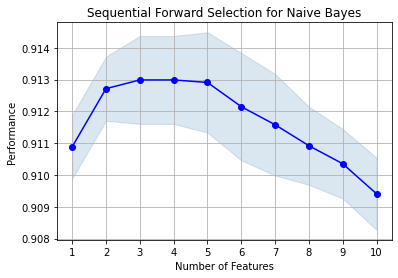

In [42]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(ffs_naivebayes.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for Naive Bayes')
plt.grid()
plt.show()

In [43]:
download=pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
download.to_csv("forwardfloating.desiciontree.csv")
pd.DataFrame.from_dict(ffs_dtree.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9101538682256735, 0.9104579630895421, 0.915...",0.911399,"(source_server,)",0.002596,0.00202,0.00101
2,"(0, 2)","[0.9101538682256735, 0.9104579630895421, 0.915...",0.911399,"(course_id, source_server)",0.002596,0.00202,0.00101
3,"(0, 2, 9)","[0.9080046069680391, 0.9072823901177823, 0.910...",0.908058,"(course_id, source_server, event_wiki)",0.001708,0.001329,0.000664
4,"(0, 2, 4, 9)","[0.900445978995828, 0.8961432904810054, 0.9001...",0.899089,"(course_id, source_server, event_discussion, e...",0.002435,0.001895,0.000947
5,"(0, 2, 4, 7, 9)","[0.8918879698157016, 0.8920242283558811, 0.895...",0.893137,"(course_id, source_server, event_discussion, e...",0.001645,0.00128,0.00064
6,"(0, 2, 4, 7, 8, 9)","[0.8890027072510427, 0.8871185821304586, 0.885...",0.88745,"(course_id, source_server, event_discussion, e...",0.001955,0.001521,0.000761
7,"(0, 2, 3, 4, 5, 7, 9)","[0.8841122868900646, 0.8786493659687409, 0.883...",0.882389,"(course_id, source_server, event_access, event...",0.002778,0.002161,0.001081
8,"(0, 1, 2, 3, 4, 5, 7, 9)","[0.877662721893491, 0.8781930427710621, 0.8772...",0.87862,"(course_id, source_browser, source_server, eve...",0.001634,0.001271,0.000636
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.8768900088941596, 0.8764427345368452, 0.876...",0.87765,"(course_id, source_browser, source_server, eve...",0.001741,0.001355,0.000677
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.8790086924357314, 0.8788438793613247, 0.878...",0.877912,"(course_id, source_browser, source_server, eve...",0.00205,0.001595,0.000797


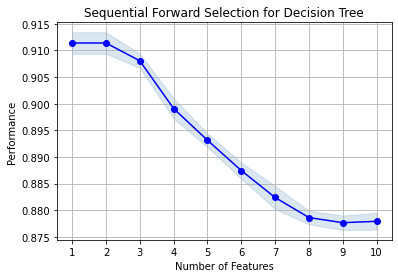

In [44]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig2 = plot_sfs(ffs_dtree.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for Decision Tree')
plt.grid()
plt.show()

In [45]:
download=pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
download.to_csv("forwardfloating.mlp.csv")
pd.DataFrame.from_dict(ffs_mlp.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9083080964717043, 0.9106518053601702, 0.914...",0.91101,"(source_server,)",0.002735,0.002128,0.001064
2,"(2, 7)","[0.9083927591881514, 0.9121181410163602, 0.914...",0.912372,"(source_server, event_problem)",0.002875,0.002237,0.001118
3,"(2, 4, 7)","[0.9121910860102881, 0.9123503102005482, 0.918...",0.913637,"(source_server, event_discussion, event_problem)",0.002906,0.002261,0.00113
4,"(2, 4, 7, 8)","[0.9129293292573277, 0.9134891055045872, 0.918...",0.915107,"(source_server, event_discussion, event_proble...",0.00254,0.001976,0.000988
5,"(2, 4, 7, 8, 9)","[0.9120167793729432, 0.9153862645608519, 0.918...",0.915043,"(source_server, event_discussion, event_proble...",0.002674,0.00208,0.00104
6,"(2, 4, 6, 7, 8, 9)","[0.9134230108757871, 0.9139082205814816, 0.913...",0.91404,"(source_server, event_discussion, event_page_c...",0.001095,0.000852,0.000426
7,"(0, 2, 3, 4, 7, 8, 9)","[0.9131684876365728, 0.9146169069833191, 0.918...",0.915014,"(course_id, source_server, event_access, event...",0.002251,0.001751,0.000876
8,"(0, 1, 2, 3, 4, 7, 8, 9)","[0.9144813468393745, 0.9154353751255201, 0.917...",0.915289,"(course_id, source_browser, source_server, eve...",0.001494,0.001163,0.000581
9,"(0, 1, 2, 3, 4, 6, 7, 8, 9)","[0.9052490606748259, 0.9089774264017477, 0.913...",0.911329,"(course_id, source_browser, source_server, eve...",0.004724,0.003675,0.001838
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9145817807587211, 0.9133264573034108, 0.919...",0.915147,"(course_id, source_browser, source_server, eve...",0.002686,0.00209,0.001045


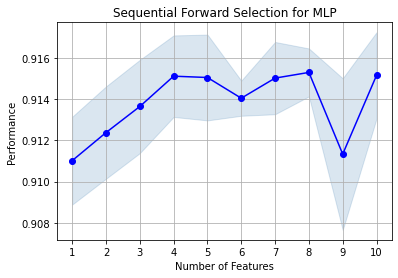

In [46]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig3 = plot_sfs(ffs_mlp.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for MLP')
plt.grid()
plt.show()

In [47]:
download=pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
download.to_csv("forwardfloating.randomforest.csv")
pd.DataFrame.from_dict(ffs_randomforest.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9101676057854503, 0.9103597122302158, 0.915...",0.911311,"(source_server,)",0.002583,0.00201,0.001005
2,"(0, 2)","[0.910055946062258, 0.9103269666558756, 0.9153...",0.911344,"(course_id, source_server)",0.002576,0.002004,0.001002
3,"(0, 2, 9)","[0.9086279853690025, 0.9079763398458506, 0.911...",0.908627,"(course_id, source_server, event_wiki)",0.001866,0.001452,0.000726
4,"(2, 4, 7, 9)","[0.906459200289488, 0.9057627609159643, 0.9090...",0.906681,"(source_server, event_discussion, event_proble...",0.001753,0.001364,0.000682
5,"(0, 2, 4, 7, 9)","[0.9059730111066894, 0.906177662037037, 0.9083...",0.906763,"(course_id, source_server, event_discussion, e...",0.001598,0.001244,0.000622
6,"(0, 2, 4, 7, 8, 9)","[0.9068232905518091, 0.9067179059565674, 0.908...",0.907497,"(course_id, source_server, event_discussion, e...",0.001057,0.000822,0.000411
7,"(0, 2, 4, 6, 7, 8, 9)","[0.9085714285714286, 0.9070314479064886, 0.910...",0.908957,"(course_id, source_server, event_discussion, e...",0.001752,0.001363,0.000682
8,"(1, 2, 3, 5, 6, 7, 8, 9)","[0.9109917444752875, 0.9100953206239167, 0.913...",0.911213,"(source_browser, source_server, event_access, ...",0.001388,0.00108,0.00054
9,"(1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9097934421493572, 0.9095104189198934, 0.914...",0.911093,"(source_browser, source_server, event_access, ...",0.002257,0.001756,0.000878
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9097798628653916, 0.9091631451583776, 0.914...",0.911353,"(course_id, source_browser, source_server, eve...",0.00269,0.002093,0.001046


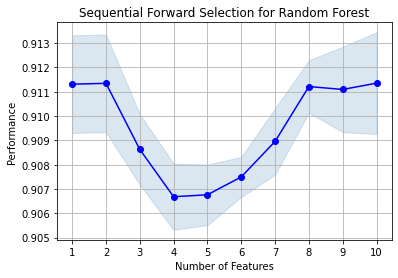

In [48]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig4 = plot_sfs(ffs_randomforest.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection for Random Forest')
plt.grid()
plt.show()

In [59]:
download=pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
download.to_csv("forwardfloating.SVM.csv")
pd.DataFrame.from_dict(ffs_svc.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9101728131124176, 0.9117237935585121, 0.915...",0.912078,"(source_server,)",0.002199,0.001711,0.000855
2,"(2, 7)","[0.9123731529286095, 0.9132358187656083, 0.916...",0.91374,"(source_server, event_problem)",0.001949,0.001516,0.000758
3,"(2, 4, 7)","[0.9128763613068547, 0.913962022159678, 0.9172...",0.914538,"(source_server, event_discussion, event_problem)",0.001994,0.001552,0.000776
4,"(2, 4, 7, 9)","[0.913173439612839, 0.9143549018909582, 0.9174...",0.914797,"(source_server, event_discussion, event_proble...",0.001991,0.001549,0.000774
5,"(2, 4, 7, 8, 9)","[0.91288256227758, 0.9141880098315107, 0.91789...",0.914855,"(source_server, event_discussion, event_proble...",0.002201,0.001712,0.000856
6,"(2, 3, 4, 7, 8, 9)","[0.9126393390077994, 0.9141207087091369, 0.917...",0.91496,"(source_server, event_access, event_discussion...",0.002265,0.001762,0.000881
7,"(1, 3, 5, 6, 7, 8, 9)","[0.9132882080513003, 0.9144936325045481, 0.917...",0.915392,"(source_browser, event_access, event_navigate,...",0.001983,0.001543,0.000771
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.913249492322491, 0.9144936325045481, 0.9179...",0.915371,"(course_id, source_browser, event_access, even...",0.001995,0.001552,0.000776
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.9131967943009794, 0.9144385026737968, 0.917...",0.915249,"(course_id, source_browser, event_access, even...",0.001937,0.001507,0.000753
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9127770255825555, 0.9142795990439839, 0.917...",0.914948,"(course_id, source_browser, source_server, eve...",0.002057,0.001601,0.0008


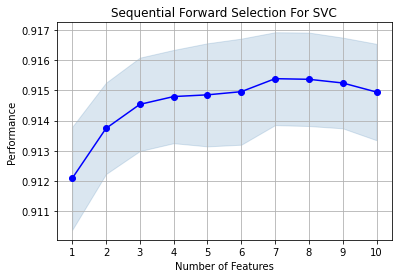

In [60]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_svc.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection For SVC')
plt.grid()
plt.show()

In [51]:
download=pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
download.to_csv("forwardfloating.knn.csv")
pd.DataFrame.from_dict(ffs_knn.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.8742640716991037, 0.9018415876989093, 0.907...",0.898097,"(source_server,)",0.015469,0.012035,0.006018
2,"(2, 6)","[0.9032211521119649, 0.9020359454670379, 0.905...",0.902641,"(source_server, event_page_close)",0.002229,0.001734,0.000867
3,"(2, 6, 7)","[0.9041343202744176, 0.9035192203573362, 0.903...",0.904415,"(source_server, event_page_close, event_problem)",0.001562,0.001216,0.000608
4,"(2, 5, 6, 7)","[0.9054449542941793, 0.9028410323140317, 0.906...",0.905304,"(source_server, event_navigate, event_page_clo...",0.001998,0.001554,0.000777
5,"(2, 5, 6, 7, 8)","[0.9013062409288825, 0.9050048854630333, 0.907...",0.905381,"(source_server, event_navigate, event_page_clo...",0.003094,0.002407,0.001204
6,"(1, 2, 5, 6, 7, 8)","[0.9056958139198902, 0.9045841637977894, 0.907...",0.906088,"(source_browser, source_server, event_navigate...",0.001379,0.001073,0.000536
7,"(0, 1, 3, 5, 6, 7, 8)","[0.9058895838605879, 0.9066772770020978, 0.908...",0.906682,"(course_id, source_browser, event_access, even...",0.002016,0.001569,0.000784
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.9049308522192456, 0.9055551531831679, 0.908...",0.906198,"(course_id, source_browser, event_access, even...",0.002502,0.001947,0.000973
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.9028662420382165, 0.9048032407407407, 0.909...",0.905601,"(course_id, source_browser, event_access, even...",0.002859,0.002225,0.001112
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9052974145724101, 0.9031159420289855, 0.908...",0.905026,"(course_id, source_browser, source_server, eve...",0.002139,0.001664,0.000832


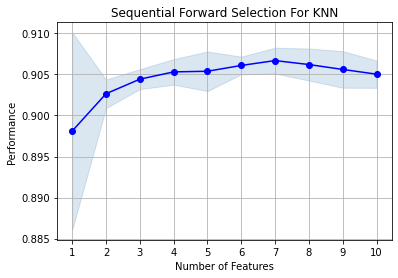

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_knn.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection For KNN')
plt.grid()
plt.show()

In [53]:
download=pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
download.to_csv("forwardfloating.lr.csv")
pd.DataFrame.from_dict(ffs_lr.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9102631857097557, 0.912184489910708, 0.9133...",0.911661,"(source_server,)",0.00136,0.001058,0.000529
2,"(2, 4)","[0.9113307447935051, 0.9125829685072729, 0.915...",0.913101,"(source_server, event_discussion)",0.002083,0.001621,0.00081
3,"(2, 4, 6)","[0.9119277065904197, 0.9131923606453207, 0.915...",0.91339,"(source_server, event_discussion, event_page_c...",0.001618,0.001259,0.000629
4,"(2, 4, 6, 9)","[0.9121146852159175, 0.913135593220339, 0.9161...",0.913668,"(source_server, event_discussion, event_page_c...",0.001737,0.001351,0.000676
5,"(2, 3, 4, 6, 9)","[0.9120774312056237, 0.9133535767248075, 0.916...",0.913805,"(source_server, event_access, event_discussion...",0.002133,0.00166,0.00083
6,"(2, 3, 4, 5, 6, 9)","[0.9118976967641657, 0.9132690882134914, 0.917...",0.913829,"(source_server, event_access, event_discussion...",0.002309,0.001796,0.000898
7,"(0, 1, 2, 4, 5, 6, 9)","[0.9119734472652803, 0.9131278901479049, 0.917...",0.913901,"(course_id, source_browser, source_server, eve...",0.00223,0.001735,0.000868
8,"(0, 1, 2, 4, 5, 6, 7, 9)","[0.9119485748596051, 0.9129421732683753, 0.917...",0.91384,"(course_id, source_browser, source_server, eve...",0.002296,0.001786,0.000893
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913446,"(course_id, source_browser, source_server, eve...",0.002394,0.001862,0.000931
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9115963536145856, 0.9127900815937269, 0.916...",0.913439,"(course_id, source_browser, source_server, eve...",0.002398,0.001866,0.000933


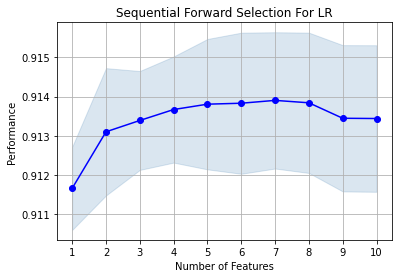

In [54]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig5 = plot_sfs(ffs_lr.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection For LR')
plt.grid()
plt.show()